# Предсказание оттока клиентов
## 0) Постановка задачи

Сотрудники отдел маркетинга компании Мегафон знают, как важно быть максимально внимательными к нуждам клиентов, но не навязчивыми. Поэтому они разработали промоакцию для тех, кто не очень удовлетворен качеством услуг и подумывает о смене провайдера связи. Это специальный тарифный план с очень большой скидкой для удержания таких клиентов.

Но для того, чтобы окончательно оценить бюджет этой кампании на следующий месяц, маркетологам нужна помощь датасайентистов. Важно определить именно тех клиентов, которые на грани ухода и удержать их. Отток (сhurn - loss of customers) это большая проблема для телеком компаний, потому что привлечение нового клиента стоит намного дороже удержания существующего.

Вам, как датасайентистам, необходимо предсказать: уйдет ли этот клиент в течение следующего месяца или нет.

**Задача и данные**
<br/>*Прогнозирование оттока клиентов телекоммуникационной компании*
<br/>На основе данных о клиентах телекоммуникационной компании предсказать: уйдет ли этот клиент в течение следующего месяца.

**Целевая переменная** 
<br/>*Churn* (1 - клиент расторгнет договор в течение следующего месяца, 0 - останется клиентом).

<br/>**Метрика качества предсказания**: 
<br/>*F2(Бета)*

**Данные**
<br/>*train.csv* - набор данных для обучения
<br/>*test.csv* - набор данных для предсказания
<br/>*sample_submission.csv* - пример сабмита для отправки в проверяющую систему

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
final_test  = pd.read_csv('final_test.csv')

train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


В наборе данных, на который рассчитаны задания этого чемпионата, собраны данные о пользователях телекоммуникационной компании:

* *State* — штат
* *Account length* — как долго этот клиент с компанией (количество дней)
* *Area code* — код географической зоны
* *International plan* — подключен ли специальный тариф для международных звонков
* *Voice mail plan* — подключен ли сервис голосовых сообщений
* *Number vmail messages* — количество отправленных голосовых сообщений
* *Total day minutes* — продолжительность разговоров в дневное время (минуты)
* *Total day calls* — количество звонков в дневное время
* *Total day charge* — расходы на звонки в дневное время
* *Total eve minutes* — продолжительность разговоров в вечернее время (минуты)
* *Total eve calls* — количество звонков в вечернее время
* *Total eve charge* — расходы на звонки в вечернее время
* *Total night minutes* — продолжительность разговоров в ночное время (минуты)
* *Total night calls* — количество звонков в ночное время
* *Total night charge* — расходы на звонки в ночное время
* *Total intl minutes* — продолжительность разговоров в международных время (минуты)
* *Total intl calls* — количество звонков в международных время
* *Total intl charge* — расходы на звонки в международных время
* *Customer service calls* — количество обращений в службу поддержки
* *Churn* — текущий статус клиента (ушел/остался). Целевая переменная

## 1) Предобработка данных

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [4]:
from collections import Counter

for col in train.columns:
    if train[col].dtype == "object":
        print(col+": ", end="")
        c = Counter(train[col])
        print(c.elements)
        print()

State: <bound method Counter.elements of Counter({'WV': 88, 'MN': 70, 'NY': 68, 'VA': 67, 'OH': 66, 'AL': 66, 'WY': 66, 'OR': 62, 'WI': 61, 'NV': 61, 'MD': 60, 'UT': 60, 'CO': 59, 'CT': 59, 'MI': 58, 'VT': 57, 'ID': 56, 'NC': 56, 'TX': 55, 'FL': 54, 'IN': 54, 'MT': 53, 'KS': 52, 'OK': 52, 'MA': 52, 'MO': 51, 'DE': 51, 'NJ': 50, 'GA': 49, 'SD': 49, 'ME': 49, 'SC': 49, 'RI': 48, 'WA': 48, 'MS': 48, 'AR': 47, 'AZ': 45, 'NE': 45, 'IL': 45, 'DC': 45, 'NM': 44, 'HI': 44, 'ND': 44, 'NH': 43, 'AK': 43, 'KY': 43, 'TN': 41, 'IA': 38, 'PA': 36, 'LA': 35, 'CA': 24})>

International plan: <bound method Counter.elements of Counter({'No': 2396, 'Yes': 270})>

Voice mail plan: <bound method Counter.elements of Counter({'No': 1933, 'Yes': 733})>



Приведем к булевому типу колонки со значениями: 'No', 'Yes'

In [5]:
#train["International plan"] = train["International plan"].astype("bool")
#train["Voice mail plan"]    = train["Voice mail plan"]   .astype("bool")
train['International plan'] = train['International plan'].replace({"Yes":1,"No":0}).astype('int64')
train['Voice mail plan'] = train['Voice mail plan'].replace({"Yes":1,"No":0}).astype('int64')

In [6]:
train.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,0.101275,0.274944,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,0.301750,0.446570,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,0.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,0.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,0.000000,1.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,1.000000,1.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Исследуем на корреляцию значения:

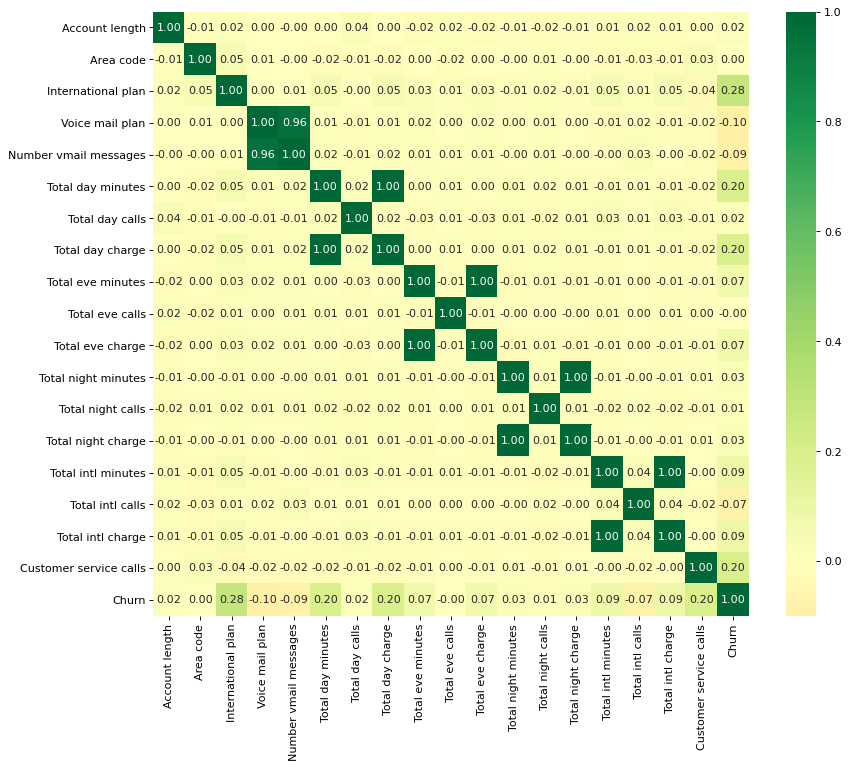

In [7]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(train.corr(), 
            xticklabels=train.corr().columns, yticklabels=train.corr().columns, 
            cmap='RdYlGn', center=0
           , annot=True, fmt =".2f"
           )
plt.show()

Из корреляционного анализа выше видно, что существует прямая связь между минутами и затратами на связь, значит одна переменная из них лишняя, <br/>уберем затраченные минуты и индикатор сервиса голосовых сообщений: 

In [8]:
train = train.drop(
    columns = [
        "Total day minutes", 
        "Total eve minutes", 
        "Total night minutes", 
        "Total intl minutes",
        
        "Voice mail plan"
    ]
)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int64  
 4   Number vmail messages   2666 non-null   int64  
 5   Total day calls         2666 non-null   int64  
 6   Total day charge        2666 non-null   float64
 7   Total eve calls         2666 non-null   int64  
 8   Total eve charge        2666 non-null   float64
 9   Total night calls       2666 non-null   int64  
 10  Total night charge      2666 non-null   float64
 11  Total intl calls        2666 non-null   int64  
 12  Total intl charge       2666 non-null   float64
 13  Customer service calls  2666 non-null   int64  
 14  Churn                   2666 non-null   

Проверим параметр Area code, на то, зависит ли он от названия штата:

In [10]:
len(train.groupby("State")["Area code"]) == 51

True

Как видно, что он скорее является группой штатов (как бы полное разбиение(теорема факторизации)), а не отдельным значеним, что будет достаточно
<br/>вот и удалим его: 

In [11]:
train = train.drop(columns = ["Area code"])

Просмотрим, если связь оттока и штата:

In [12]:
 train.groupby("State")['Churn'].sum().describe()

count    51.000000
mean      7.607843
std       3.481830
min       2.000000
25%       5.000000
50%       7.000000
75%      10.000000
max      16.000000
Name: Churn, dtype: float64

Связь имеется => стоит оставить значения, для этого проведём бинаризацию: 

In [13]:
train = pd.get_dummies(train)
#train = train.drop(columns = ["State"])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   International plan      2666 non-null   int64  
 2   Number vmail messages   2666 non-null   int64  
 3   Total day calls         2666 non-null   int64  
 4   Total day charge        2666 non-null   float64
 5   Total eve calls         2666 non-null   int64  
 6   Total eve charge        2666 non-null   float64
 7   Total night calls       2666 non-null   int64  
 8   Total night charge      2666 non-null   float64
 9   Total intl calls        2666 non-null   int64  
 10  Total intl charge       2666 non-null   float64
 11  Customer service calls  2666 non-null   int64  
 12  Churn                   2666 non-null   bool   
 13  State_AK                2666 non-null   uint8  
 14  State_AL                2666 non-null   

Данные для обучения обработаны !

## 2) Подготовка данных

Разобъём выборку на тренеровочную и проверочную (80/20):

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=["Churn"]), train["Churn"], test_size=0.2)

Проверим распределения значений (оно должно быть одинаковым):

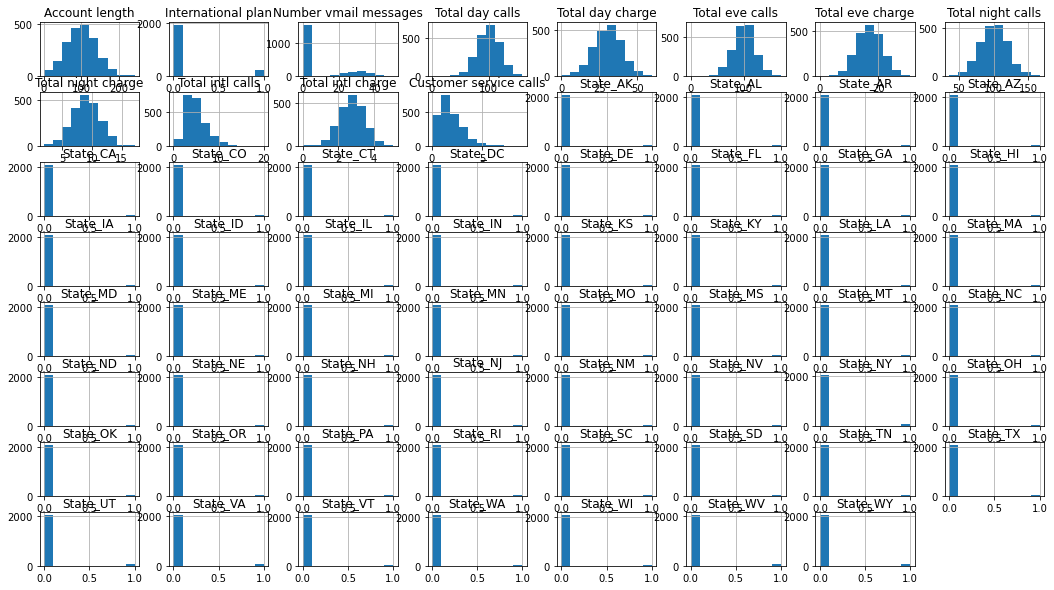

In [16]:
X_train.hist(figsize=(18, 10));

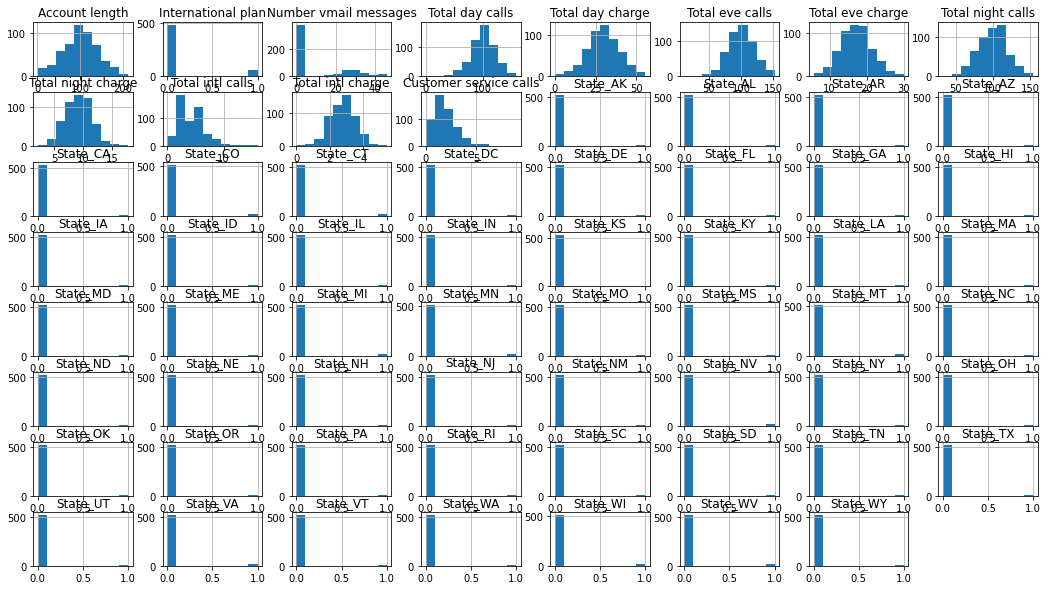

In [17]:
X_test.hist(figsize=(18, 10));

Распределний значений одинаковое => данные распределились равномерно

Повторим все операции преобработки на данных для предсказания:

In [18]:
#final_test

#Приводим к bool:
#final_test["International plan"] = final_test["International plan"].astype("bool")
#final_test["Voice mail plan"]    = final_test["Voice mail plan"]   .astype("bool")
final_test['International plan'] = final_test['International plan'].replace({"Yes":1,"No":0}).astype('int64')
final_test['Voice mail plan'] = final_test['Voice mail plan'].replace({"Yes":1,"No":0}).astype('int64')

#Убираем лишние колонки:
final_test = final_test.drop(
    columns = [
        "Total day minutes", 
        "Total eve minutes", 
        "Total night minutes", 
        "Total intl minutes",
        
        "Area code",
        'Voice mail plan'
    ]
)

#Производим бинаризацию поля штата:
final_test = pd.get_dummies(final_test)
#final_test = final_test.drop(columns = ["State"])

final_test

,Account length,International plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,117,0,0,97,31.37,80,29.89,90,9.71,4,...,0,0,0,0,0,0,0,0,0,0
1,65,0,0,137,21.95,83,19.42,111,9.40,6,...,0,0,0,0,0,0,0,0,0,0
2,161,0,0,67,56.59,97,27.01,128,7.23,9,...,0,0,0,0,0,0,0,0,0,0
3,111,0,0,103,18.77,102,11.67,105,8.53,6,...,0,0,0,0,0,0,0,0,0,0
4,49,0,0,117,20.28,109,18.28,90,8.04,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,0,26,88,23.31,125,13.23,94,11.14,7,...,0,0,0,0,0,0,0,1,0,0
663,106,0,29,131,14.21,131,17.33,73,10.33,3,...,0,0,0,0,0,0,0,0,0,0
664,60,0,0,118,32.96,110,7.23,134,9.45,8,...,0,0,0,0,0,1,0,0,0,0
665,159,0,0,114,28.87,105,16.80,82,8.72,4,...,0,0,0,0,0,0,0,0,1,0


Данные готовы для обучения!

## 3) Обучение модели

Целевая метрика обучения F(бета=2), импортируем её:

In [19]:
from sklearn.metrics import fbeta_score

Рассмотрим несколько моделей, на их степень соответствия метрике:

### 3.1) Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Инициализируем модель состоящую из 1000 решающих деревьев:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

#обучаем:
rf.fit(X_train, y_train)

#получаем предсказание:
y_pred = rf.predict(X_test)

#расчитываем показатель:
fbeta_score(y_test, y_pred, beta = 2)


#дальше без аналогичных комментариев)

0.5357142857142859

### 3.2) Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy", max_features = 5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

fbeta_score(y_test, y_pred, beta = 2)

0.39260969976905313

### 3.3) Подбор параметров
Дальше я решил по пробовать методом перебора найти наиболее удачные параметры для обучения, для методов выше

Создал словарь, для поиска в полученных параметрах максимального:

In [22]:
secsfull_learn = {
    "dt": list(),
    "rf": list()
}

#### Decision Tree подбор:

In [23]:
# Глубина - 8 F метрика - 0.7416267942583733
for depth in range(2, 50):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    secsfull_learn["dt"].append(fbeta_score(y_test, y_pred, beta = 2))
    print('Глубина -', depth,'F метрика -', fbeta_score(y_test, y_pred, beta = 2))

Глубина - 2 F метрика - 0.26809651474530827
Глубина - 3 F метрика - 0.49118387909319905
Глубина - 4 F метрика - 0.601965601965602
Глубина - 5 F метрика - 0.7459207459207459
Глубина - 6 F метрика - 0.7416267942583733
Глубина - 7 F метрика - 0.7535885167464115
Глубина - 8 F метрика - 0.7517899761336515
Глубина - 9 F метрика - 0.7529411764705882
Глубина - 10 F метрика - 0.7547169811320754
Глубина - 11 F метрика - 0.7593457943925233
Глубина - 12 F метрика - 0.7558139534883721
Глубина - 13 F метрика - 0.7291666666666667
Глубина - 14 F метрика - 0.7437070938215103
Глубина - 15 F метрика - 0.7208237986270022
Глубина - 16 F метрика - 0.7369614512471656
Глубина - 17 F метрика - 0.715909090909091
Глубина - 18 F метрика - 0.7272727272727272
Глубина - 19 F метрика - 0.7110609480812641
Глубина - 20 F метрика - 0.7241379310344828
Глубина - 21 F метрика - 0.7208237986270022
Глубина - 22 F метрика - 0.7208237986270022
Глубина - 23 F метрика - 0.7208237986270022
Глубина - 24 F метрика - 0.7208237986270

#### Random Forest подбор:

In [24]:
#240 0.64
for estimator in range(50, 300, 10):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    secsfull_learn["rf"].append(fbeta_score(y_test, y_pred, beta = 2))
    print('N estimators', estimator,'F ', fbeta_score(y_test, y_pred, beta = 2))

N estimators 50 F  0.47803617571059437
N estimators 60 F  0.46511627906976744
N estimators 70 F  0.5012853470437019
N estimators 80 F  0.5000000000000001
N estimators 90 F  0.5128205128205129
N estimators 100 F  0.524296675191816
N estimators 110 F  0.5256410256410255
N estimators 120 F  0.5141388174807198
N estimators 130 F  0.5256410256410255
N estimators 140 F  0.5141388174807198
N estimators 150 F  0.5154639175257731
N estimators 160 F  0.5154639175257731
N estimators 170 F  0.5370843989769821
N estimators 180 F  0.5370843989769821
N estimators 190 F  0.5370843989769821
N estimators 200 F  0.5370843989769821
N estimators 210 F  0.5470737913486006
N estimators 220 F  0.524296675191816
N estimators 230 F  0.5370843989769821
N estimators 240 F  0.5370843989769821
N estimators 250 F  0.5141388174807198
N estimators 260 F  0.5141388174807198
N estimators 270 F  0.5141388174807198
N estimators 280 F  0.5025773195876289
N estimators 290 F  0.5141388174807198


Тут я как результировал результат подбора параметров:

In [25]:
# Глубина - 8 F метрика - 0.7416267942583733
print (max(secsfull_learn["rf"]) )
print (max(secsfull_learn["dt"]) )

0.5470737913486006
0.7593457943925233


Тут ячейка подготовленная для сохранения результатов подбора параметров:

In [26]:
model = DecisionTreeClassifier(random_state=12345, max_depth=10)
model.fit(train.drop(columns=["Churn"]), train["Churn"])

submit = pd.read_csv("sample_submission.csv")
submit['Churn'] = model.predict(final_test)
submit.to_csv("predict.csv")

### 3.4) LightGBM
мне захотелось по пробовать эту модель, потому что много слышал о ней, хоть до конца не разобрался в ней

In [27]:
import lightgbm as lgb

In [28]:
train_dataset = lgb.Dataset(X_train, y_train)
test_dataset  = lgb.Dataset(X_test, y_test)

In [29]:
booster = lgb.train({"objective": "binary", "verbosity": -1},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=400)

[1]	valid_0's binary_logloss: 0.386752
[2]	valid_0's binary_logloss: 0.348281
[3]	valid_0's binary_logloss: 0.319705
[4]	valid_0's binary_logloss: 0.297777
[5]	valid_0's binary_logloss: 0.280666
[6]	valid_0's binary_logloss: 0.264507
[7]	valid_0's binary_logloss: 0.250796
[8]	valid_0's binary_logloss: 0.241268
[9]	valid_0's binary_logloss: 0.234076
[10]	valid_0's binary_logloss: 0.226106
[11]	valid_0's binary_logloss: 0.220192
[12]	valid_0's binary_logloss: 0.213841
[13]	valid_0's binary_logloss: 0.209044
[14]	valid_0's binary_logloss: 0.204854
[15]	valid_0's binary_logloss: 0.200309
[16]	valid_0's binary_logloss: 0.195709
[17]	valid_0's binary_logloss: 0.193111
[18]	valid_0's binary_logloss: 0.191667
[19]	valid_0's binary_logloss: 0.188055
[20]	valid_0's binary_logloss: 0.185948
[21]	valid_0's binary_logloss: 0.184277
[22]	valid_0's binary_logloss: 0.18328
[23]	valid_0's binary_logloss: 0.181737
[24]	valid_0's binary_logloss: 0.181061
[25]	valid_0's binary_logloss: 0.179525
[26]	valid

In [30]:
# Получаем и оцениваем предсказания

test_preds  = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

fbeta_score(y_test, test_preds, beta = 2)

0.79136690647482

Считаю предсказания и в случае если показатель F хороши - сохраняю:
<br/>В данном случае ***ID:5768466***, результат в *80 баллов*, был получен при F = 0.7993730407523512, при num_boost_round=1000
<br/>(в остальном все показатели оценились  в диапазоне 75-76 баллов, при num_boost_round > 1000)

In [31]:
predict = booster.predict(final_test)
predict = [1 if pred > 0.5 else 0 for pred in predict]

In [32]:
submit = pd.read_csv("sample_submission.csv")
submit['Churn'] = predict
submit.to_csv("predict.csv")

### 3.5) Подбор параметров к LightGBM
много работы коментариев от LightGBM, 
</br>*которые лучше не листать, а сразу начинатьс конца тетрадки*

In [33]:
fbeta_tests = list()

for i in range(2,31):
    booster = lgb.train({"objective": "binary", "verbosity": -1},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=i*100)
    test_preds  = booster.predict(X_test)
    train_preds = booster.predict(X_train)
    
    test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
    train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

    fbeta_tests.append(fbeta_score(y_test, test_preds, beta = 2))

[1]	valid_0's binary_logloss: 0.386752
[2]	valid_0's binary_logloss: 0.348281
[3]	valid_0's binary_logloss: 0.319705
[4]	valid_0's binary_logloss: 0.297777
[5]	valid_0's binary_logloss: 0.280666
[6]	valid_0's binary_logloss: 0.264507
[7]	valid_0's binary_logloss: 0.250796
[8]	valid_0's binary_logloss: 0.241268
[9]	valid_0's binary_logloss: 0.234076
[10]	valid_0's binary_logloss: 0.226106
[11]	valid_0's binary_logloss: 0.220192
[12]	valid_0's binary_logloss: 0.213841
[13]	valid_0's binary_logloss: 0.209044
[14]	valid_0's binary_logloss: 0.204854
[15]	valid_0's binary_logloss: 0.200309
[16]	valid_0's binary_logloss: 0.195709
[17]	valid_0's binary_logloss: 0.193111
[18]	valid_0's binary_logloss: 0.191667
[19]	valid_0's binary_logloss: 0.188055
[20]	valid_0's binary_logloss: 0.185948
[21]	valid_0's binary_logloss: 0.184277
[22]	valid_0's binary_logloss: 0.18328
[23]	valid_0's binary_logloss: 0.181737
[24]	valid_0's binary_logloss: 0.181061
[25]	valid_0's binary_logloss: 0.179525
[26]	valid

</br></br>
Дальше нахожу максимум из перебора
    

In [34]:
maximum = max(fbeta_tests)

In [35]:
imax = 0

for i in range(0,29):
    if fbeta_tests[i] == maximum:
        imax = i

In [36]:
fbeta_tests[imax]

0.79136690647482

И тренируем с наиболее подходящим значением:

In [37]:
booster = lgb.train({"objective": "binary", "verbosity": -1},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=imax*100)
test_preds  = booster.predict(X_test)
train_preds = booster.predict(X_train)
    
test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

fbeta_score(y_test, test_preds, beta = 2)

[1]	valid_0's binary_logloss: 0.386752
[2]	valid_0's binary_logloss: 0.348281
[3]	valid_0's binary_logloss: 0.319705
[4]	valid_0's binary_logloss: 0.297777
[5]	valid_0's binary_logloss: 0.280666
[6]	valid_0's binary_logloss: 0.264507
[7]	valid_0's binary_logloss: 0.250796
[8]	valid_0's binary_logloss: 0.241268
[9]	valid_0's binary_logloss: 0.234076
[10]	valid_0's binary_logloss: 0.226106
[11]	valid_0's binary_logloss: 0.220192
[12]	valid_0's binary_logloss: 0.213841
[13]	valid_0's binary_logloss: 0.209044
[14]	valid_0's binary_logloss: 0.204854
[15]	valid_0's binary_logloss: 0.200309
[16]	valid_0's binary_logloss: 0.195709
[17]	valid_0's binary_logloss: 0.193111
[18]	valid_0's binary_logloss: 0.191667
[19]	valid_0's binary_logloss: 0.188055
[20]	valid_0's binary_logloss: 0.185948
[21]	valid_0's binary_logloss: 0.184277
[22]	valid_0's binary_logloss: 0.18328
[23]	valid_0's binary_logloss: 0.181737
[24]	valid_0's binary_logloss: 0.181061
[25]	valid_0's binary_logloss: 0.179525
[26]	valid

0.79136690647482

In [38]:
predict = booster.predict(final_test)
predict = [1 if pred > 0.5 else 0 for pred in predict]

submit = pd.read_csv("sample_submission.csv")
submit['Churn'] = predict
submit.to_csv("predict.csv")

Но с этим подбором не продвинулся дальше (